# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [ ]:
print("Чтобы при перезапуске рандомные значения оставались неизменными. seed - это начальное значение для генератора псевдо-случайных чисел")

Чтобы при перезапуске рандомные значения оставались неизменными. seed - это начальное значение для генератора псевдо-случайных чисел


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [ ]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [ ]:
# your code here
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [ ]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [ ]:
# your code here
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [ ]:
# your code here
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


В датасете пропуски в колонках 'mileage', 'engine', 'max_power', 'torque', 'seats'

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [ ]:
# your code here
duplicate_rows = df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)]
duplicate_rows.shape[0]

1799

С одинаковым признаковым описанием в трейне 1799 объектов

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [ ]:
# your code here
duplicate_rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
duplicate_rows_test = df_test[df_test.duplicated(subset=df_test.columns.difference(['selling_price']), keep=False)]
duplicate_rows_test.shape[0]

109

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [ ]:
# your code here
unique_selling = duplicate_rows.drop_duplicates(subset=duplicate_rows.columns.difference(['selling_price']), keep='first')
unique_selling

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6860,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6861,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6946,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0


In [ ]:
uniq = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep=False)
df_train = uniq.merge(unique_selling, how = 'outer')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5836,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
5837,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
5838,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0


In [ ]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [ ]:
# your code here
df_train.reset_index(drop = True, inplace = True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5836,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
5837,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
5838,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [ ]:
df_train1 = df_train.copy()
df_test1 = df_test.copy()
df_train1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5836,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
5837,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
5838,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0


In [ ]:
df_test1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


In [ ]:
# your code here
import re
df_train1['engine'] = df_train1['engine'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
df_train1['engine'] = df_train1['engine'].astype(float)
df_train1['mileage'] = df_train1['mileage'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
df_train1['mileage'] = df_train1['mileage'].astype(float)
df_train1['max_power'] = df_train1['max_power'].str.strip()
df_train1['max_power'] = df_train1['max_power'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
df_train1['max_power'] = df_train1['max_power'].replace('', '0')
df_train1['max_power'] = df_train1['max_power'].astype(float)
df_train1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.20,1248.0,74.00,190Nm@ 2000rpm,5.0
5836,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,240Nm@ 1750rpm,5.0
5837,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.50,200Nm@ 1750rpm,5.0
5838,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0


In [ ]:
df_test1['engine'] = df_test1['engine'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
df_test1['engine'] = df_test1['engine'].astype(float)
df_test1['mileage'] = df_test1['mileage'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
df_test1['mileage'] = df_test1['mileage'].astype(float)
df_test1['max_power'] = df_test1['max_power'].str.strip()
df_test1['max_power'] = df_test1['max_power'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
df_test1['max_power'] = df_test1['max_power'].replace('', '0')
df_test1['max_power'] = df_test1['max_power'].astype(float)
df_test1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.8Nm@ 4000rpm,5.0


In [ ]:
df_train1 = df_train1.drop('torque', axis=1)
df_train1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.20,1248.0,74.00,5.0
5836,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,5.0
5837,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.50,5.0
5838,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,5.0


In [ ]:
df_test1 = df_test1.drop('torque', axis=1)
df_test1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [ ]:
# your code here
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5657 non-null   float64
 11  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


In [ ]:
median_mileage = df_train1['mileage'].median()
median_engine = df_train1['engine'].median()
median_max_power = df_train1['max_power'].median()
median_seats = df_train1['seats'].median()
df_train1['mileage'].fillna(median_mileage, inplace=True)
df_train1['engine'].fillna(median_engine, inplace=True)
df_train1['max_power'].fillna(median_max_power, inplace=True)
df_train1['seats'].fillna(median_seats, inplace=True)

df_train1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Maruti Swift VDI Optional,2015,530000,120000,Diesel,Individual,Manual,First Owner,25.20,1248.0,74.00,5.0
5836,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,5.0
5837,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.50,5.0
5838,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,5.0


In [ ]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    float64
 9   engine         981 non-null    float64
 10  max_power      981 non-null    float64
 11  seats          981 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB


In [ ]:
median_mileage_test = df_test1['mileage'].median()
median_engine_test = df_test1['engine'].median()
median_max_power_test = df_test1['max_power'].median()
median_seats_test = df_test1['seats'].median()
df_test1['mileage'].fillna(median_mileage_test, inplace=True)
df_test1['engine'].fillna(median_engine_test, inplace=True)
df_test1['max_power'].fillna(median_max_power_test, inplace=True)
df_test1['seats'].fillna(median_seats_test, inplace=True)

df_test1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [ ]:
print("<Место для ответа на вопрос про seats>")
print("Потому что seats это дискретная величина, которая имеет ограниченный набор вариантов и влияние на цену этот параметр будет оказывать, вероятно, аналогично категориям класса автомобиля. \nНапример, 5 мест это категория седан и цена одна, а категория 8 мест это внедорожник/паркетник и цена другая.")

<Место для ответа на вопрос про seats>
Потому что seats это дискретная величина, которая имеет ограниченный набор вариантов и влияние на цену этот параметр будет оказывать, вероятно, аналогично категориям класса автомобиля. 
Например, 5 мест это категория седан и цена одна, а категория 8 мест это внедорожник/паркетник и цена другая.


In [ ]:
# your code here
df_train1['engine'] = df_train1['engine'].astype(int)
df_train1['seats'] = df_train1['seats'].astype(int)
df_test1['engine'] = df_test1['engine'].astype(int)
df_test1['seats'] = df_test1['seats'].astype(int)
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int32  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 86.1+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

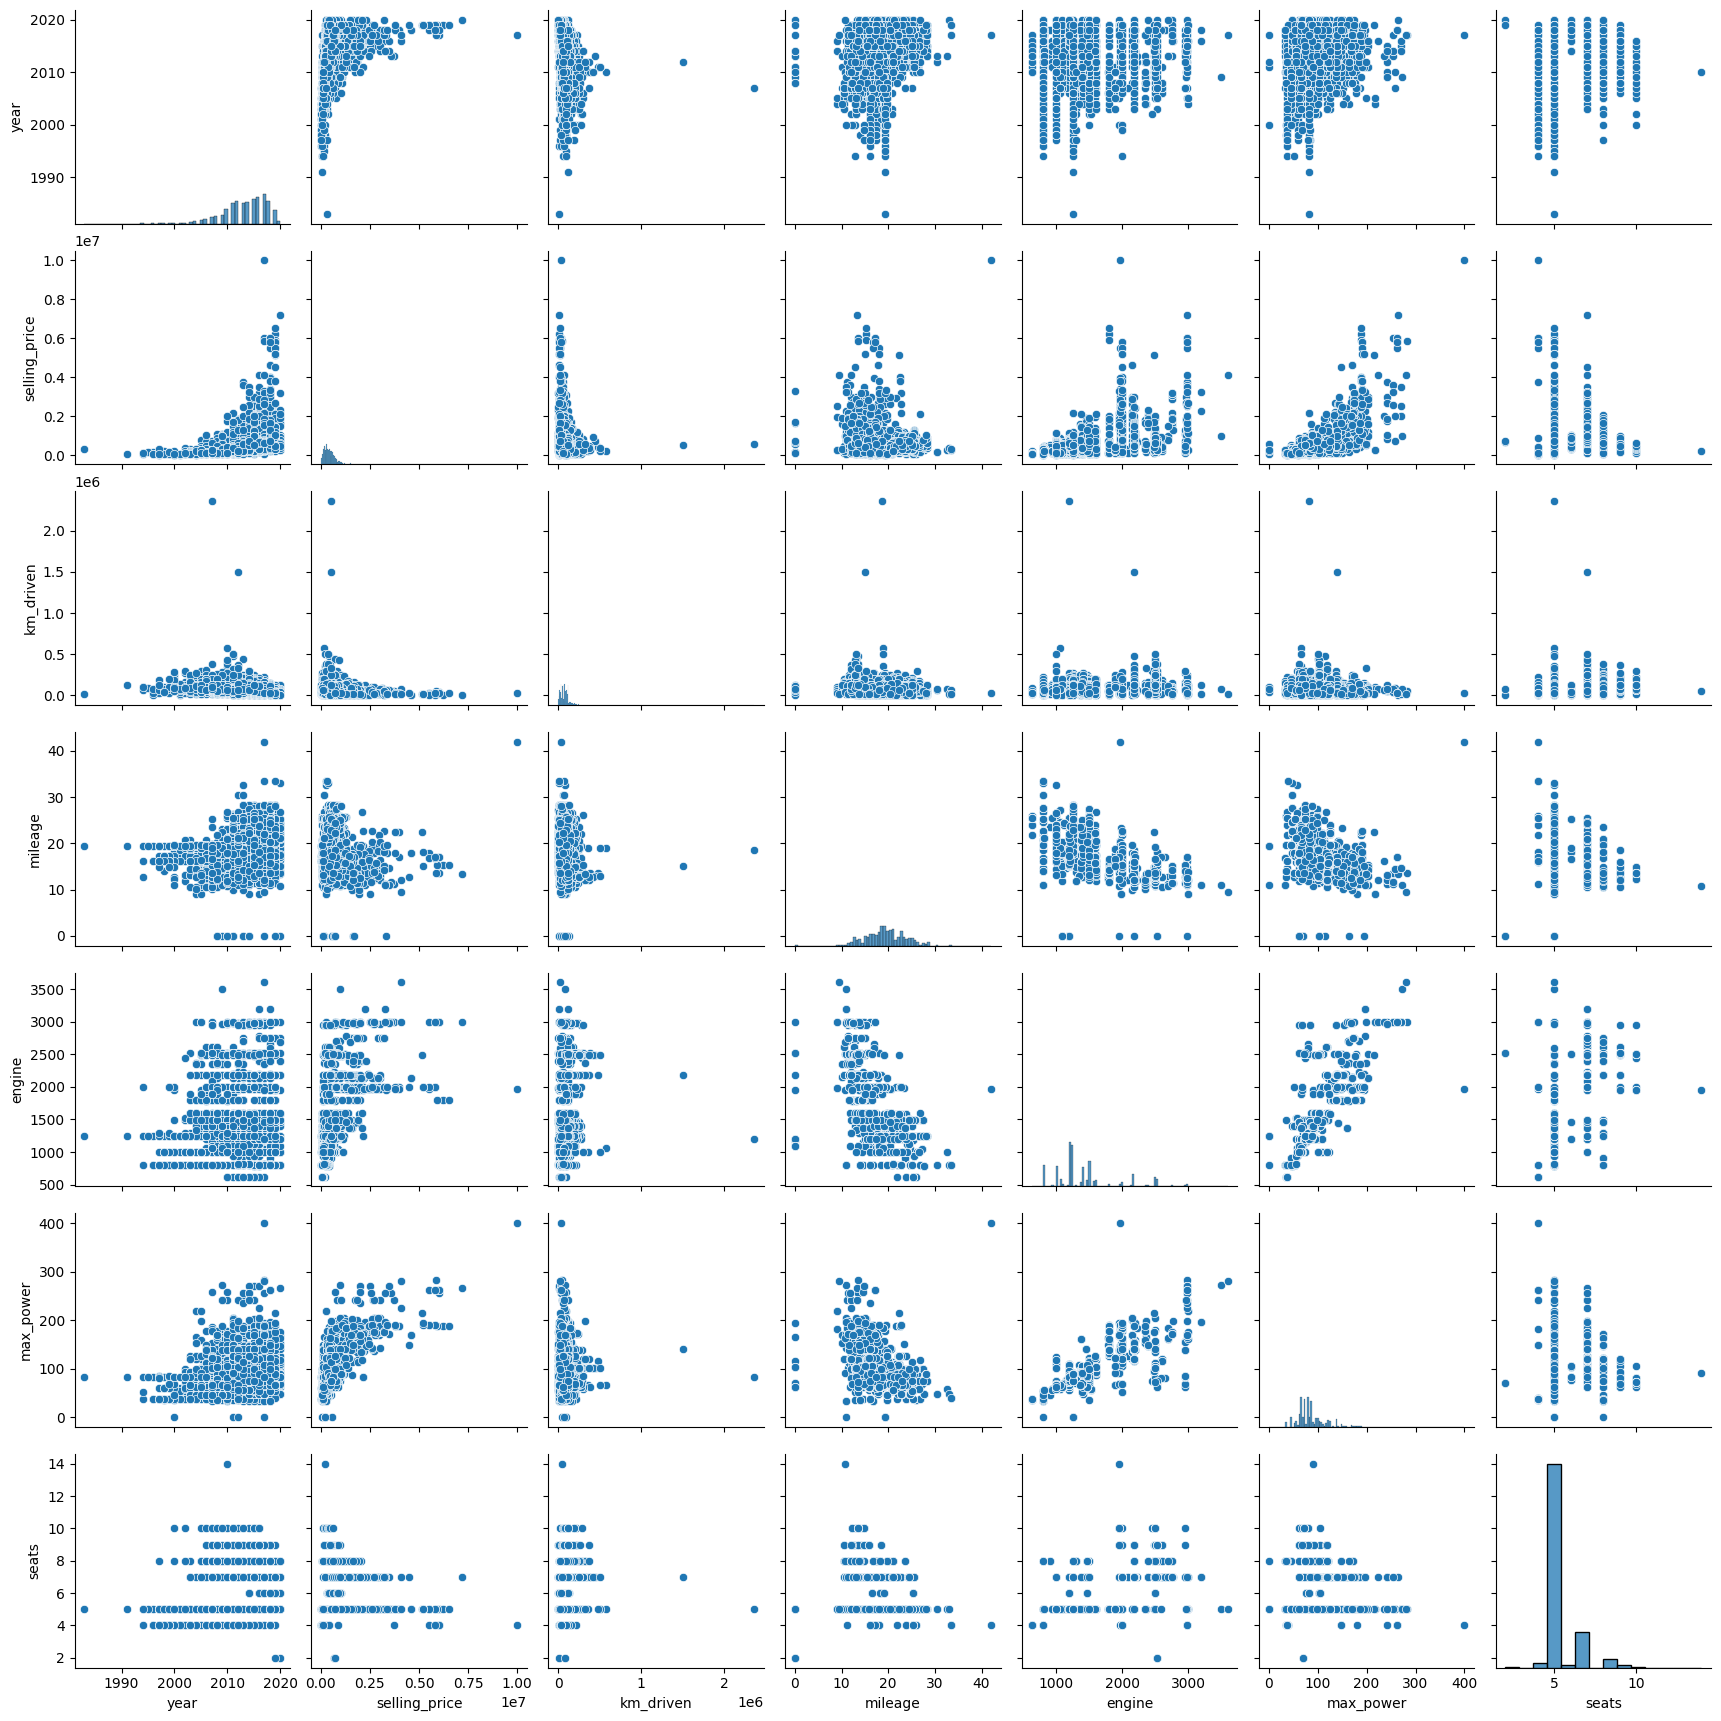

In [ ]:
# your code here
sns.pairplot(df_train1)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1) Чем старше автомобиль, тем цена ниже и наоборот
2) Чем больше пробег, тем меньше цена и наоборот
3) При высоком расходе топлива, цена уменьшается
4) Чем больше объем двигателя, тем выше цена
5) Чем больше максимальная мощность, тем выше цена и наоборот
6) Чем больше количество сидений, тем меньше цена

1) Мощность и объем двигателя сильно коррелируют между собой и ценой
2) Год и пробег отрицательно коррелируют между собой. При этом год коррелирует с ценой, а пробег отрицательно коррелирует с ценой.
3) Расход топлива и пробег отрицательно коррелируют между собой. 4) Количество сидений и объем двигателя положительно коррелируют между собой.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

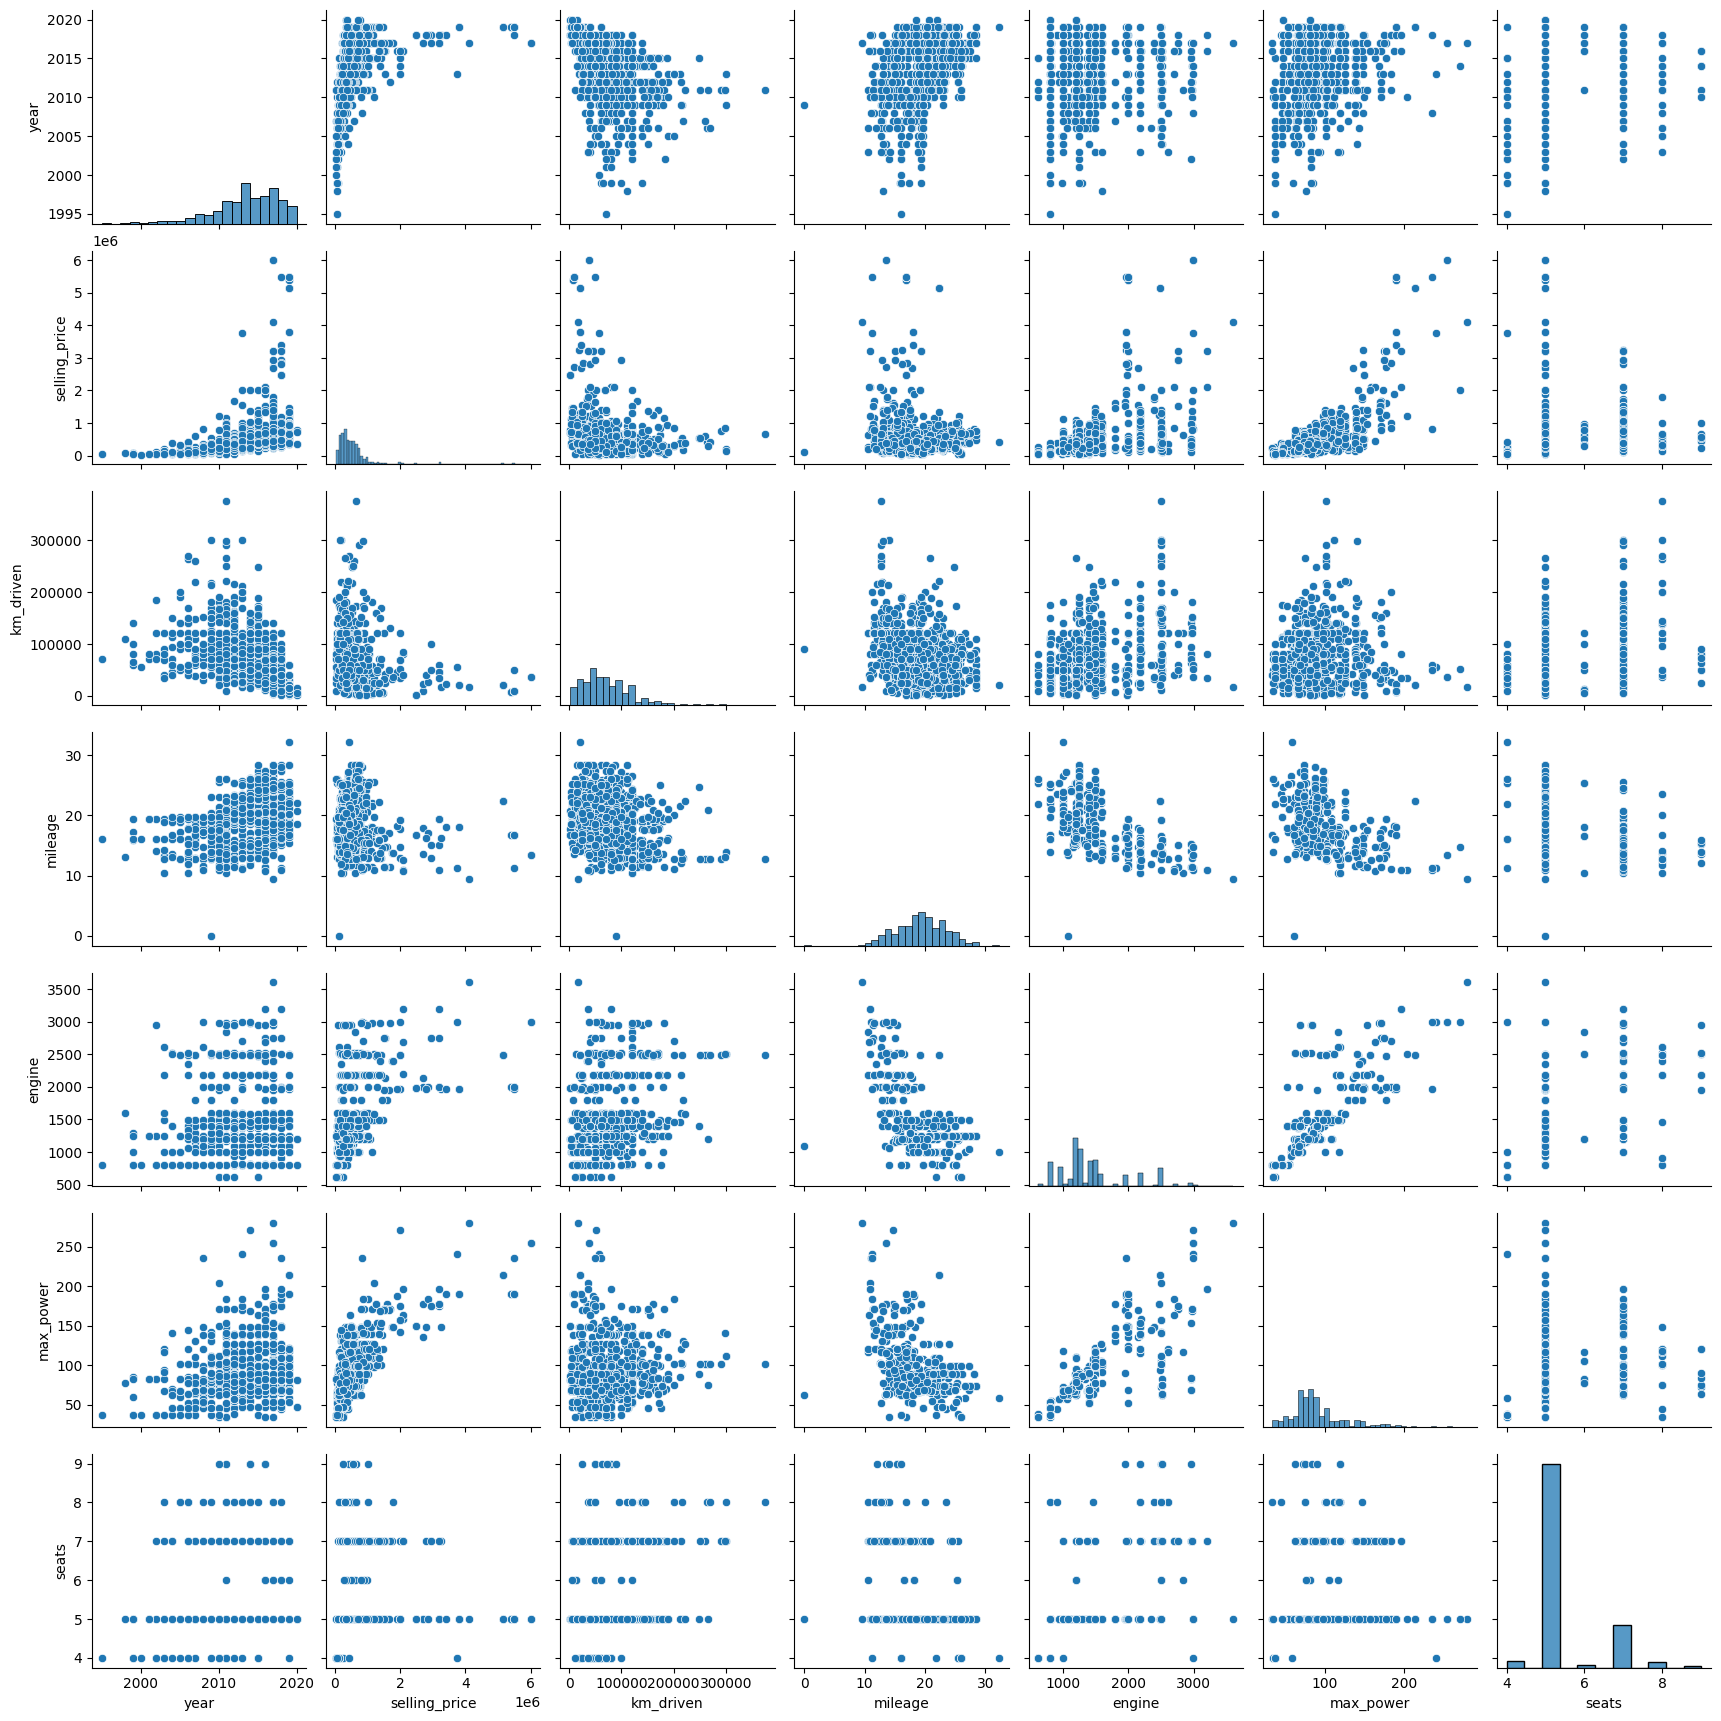

In [ ]:
# your code here
sns.pairplot(df_test1)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<ipython-input-156-a319bd6a5ff1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train1.corr()


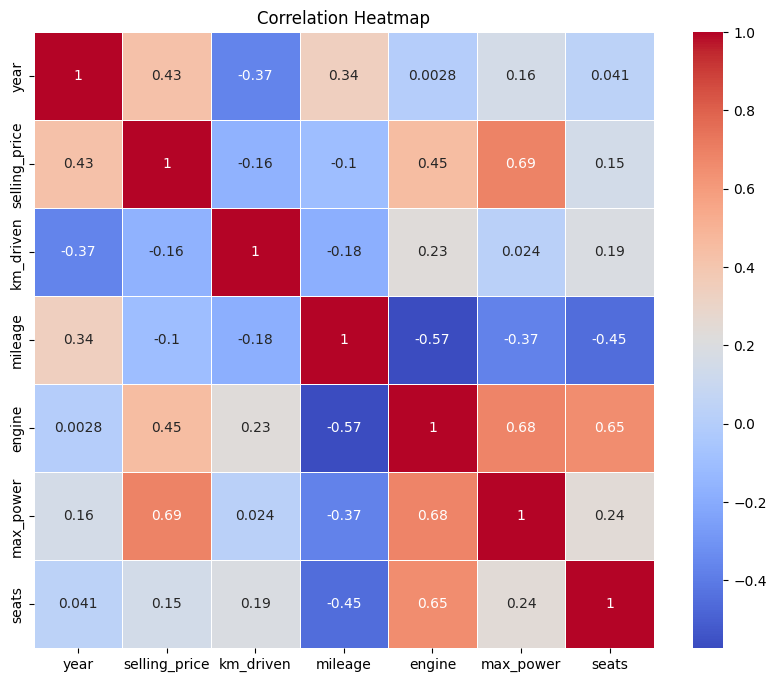

In [ ]:
# your code here
# Вычисление корреляционной матрицы
correlation_matrix = df_train1.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) Наименее скоррелированы между собой mileage и engine
2) Между max_power и selling_price
3) Да, отрицательная корреляция есть, но не такая значительная (-0,37)

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

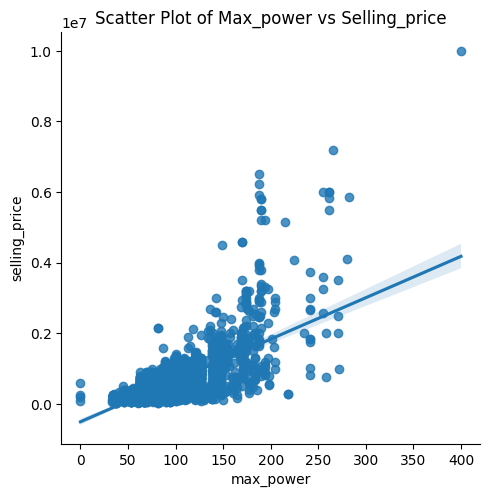

In [ ]:
# your code here
sns.lmplot(x='max_power', y='selling_price', data=df_train1)
plt.title('Scatter Plot of Max_power vs Selling_price')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

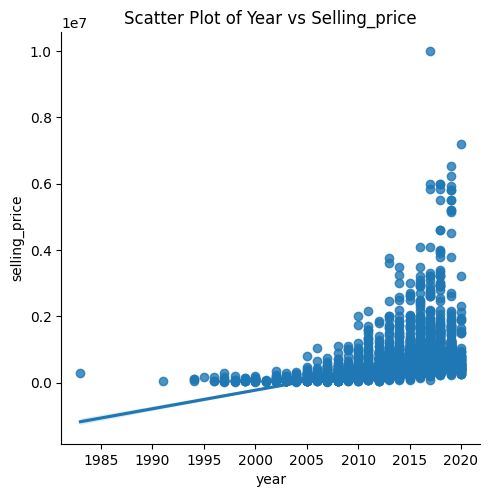

In [ ]:

sns.lmplot(x='year', y='selling_price', data=df_train1)
plt.title('Scatter Plot of Year vs Selling_price')
plt.show()

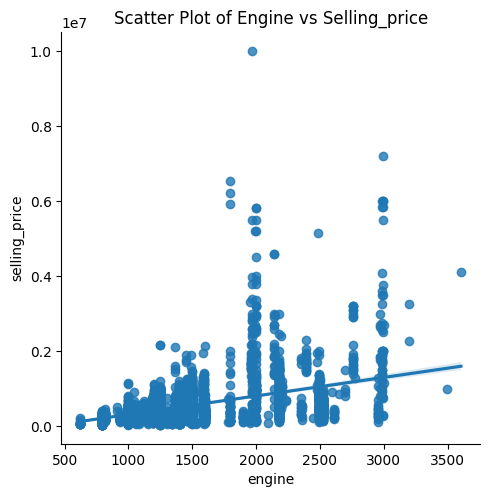

In [ ]:
sns.lmplot(x='engine', y='selling_price', data=df_train1)
plt.title('Scatter Plot of Engine vs Selling_price')
plt.show()

Еще 2 признака, которые имеют наибольшую корреляцию с ценой это пробег и мощность двигателя.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [ ]:
y_train = df_train1['selling_price'].copy()
y_train
# X_train = # your code here

0        450000
1        370000
2        225000
3        130000
4        440000
         ...   
5835     530000
5836    1265000
5837    1025000
5838     114999
5839     750000
Name: selling_price, Length: 5840, dtype: int64

In [ ]:
X_train = df_train1.drop(['selling_price','fuel','seller_type', 'transmission', 'owner', 'name'], axis = 1)
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2015,120000,25.20,1248,74.00,5
5836,2018,12000,20.37,1461,108.45,5
5837,2019,32000,28.09,1248,88.50,5
5838,2010,60000,18.00,995,62.00,5


In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
y_test = df_test1['selling_price'].copy()
y_test

0      229999
1      665000
2      175000
3      635000
4      130000
        ...  
995    250000
996    440000
997    340000
998    350000
999    700000
Name: selling_price, Length: 1000, dtype: int64

In [ ]:
X_test = df_test1.drop(['selling_price','fuel','seller_type', 'transmission', 'owner', 'name'], axis = 1)
X_test

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.00,2498,112.00,7
1,2017,25000,21.50,1497,108.50,5
2,2007,218463,12.90,1799,130.00,5
3,2015,173000,25.10,1498,98.60,5
4,2011,70000,16.50,1172,65.00,5
...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,5
996,2017,50000,18.60,1197,81.83,5
997,2009,40000,23.00,1396,90.00,5
998,2012,25000,20.36,1197,78.90,5


In [ ]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


# your code here
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [ ]:
# your code here
# Важность признаков (коэффициенты регрессии)
feature_importance = model.coef_

for i, feature in enumerate(X_train.columns):
    print(f'{feature}: {feature_importance[i]}')

year: 152413.79476422362
km_driven: -44299.63423594524
mileage: 28483.920029487097
engine: 60671.644673757255
max_power: 322577.60527068935
seats: -22512.60179358506


Наиболее информативный признак в предсказании цены max_power

In [ ]:
from sklearn.metrics import mean_squared_error
# Предсказание на тренировочном и тестовом наборах
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Расчет коэффициента детерминации (R2)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Расчет среднеквадратичной ошибки (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Вывод результатов
print(f'R2 для тренировочного набора: {r2_train}')
print(f'R2 для тестового набора: {r2_test}')
print(f'MSE для тренировочного набора: {mse_train}')
print(f'MSE для тестового набора: {mse_test}')

R2 для тренировочного набора: 0.591505076732544
R2 для тестового набора: 0.59370196434188
MSE для тренировочного набора: 117090306033.01596
MSE для тестового набора: 233551712996.09424


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



In [ ]:
# your code here

from sklearn.linear_model import Lasso
# Создание и обучение модели Lasso-регрессии
model1 = Lasso(alpha=0.1)  #alpha - это коэффициент регуляризации
model1.fit(X_train_normalized, y_train)

# Предсказание на тренировочном и тестовом наборах
y_pred_train1 = model1.predict(X_train_normalized)
y_pred_test1 = model1.predict(X_test_normalized)

# Расчет коэффициента детерминации (R2)
r2_train1 = r2_score(y_train, y_pred_train1)
r2_test1 = r2_score(y_test, y_pred_test1)

# Расчет среднеквадратичной ошибки (MSE)
mse_train1 = mean_squared_error(y_train, y_pred_train1)
mse_test1 = mean_squared_error(y_test, y_pred_test1)

# Вывод результатов
print(f'R2 для тренировочного набора: {r2_train1}')
print(f'R2 для тестового набора: {r2_test1}')
print(f'MSE для тренировочного набора: {mse_train1}')
print(f'MSE для тестового набора: {mse_test1}')

R2 для тренировочного набора: 0.5915050766461589
R2 для тестового набора: 0.593699971243852
MSE для тренировочного набора: 117090306057.77725
MSE для тестового набора: 233552858685.755


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
# your code here
# Вывод коэффициентов модели
coefficients = model1.coef_
print(coefficients)

[ 1377043.720482   -1740689.92556498   300135.0077627    372282.84679744
  4075713.94748336  -275005.01915549]


Нет, не занулила.Так как коэффициент регуляризации а слишком мал. При увеличении коэффициента регуляризации (a) некоторые веса могут быть занулены, так как модель стремится минимизировать функцию потерь за счет уменьшения весов.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here
# Задание сетки параметров для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}
# Создание объекта GridSearchCV
grid_search = GridSearchCV(model1, param_grid, cv=10)

# Поиск оптимальных параметров
grid_search.fit(X_train_normalized, y_train)

# Вывод оптимальных параметров
print(grid_search.best_params_)

{'alpha': 100}


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Пришлось обучить 100 моделей (10*10)

In [ ]:
# your code here
# Вывод лучших параметров
print("Лучший коэффициент регуляризации:", grid_search.best_params_['alpha'])

# Создание и обучение лучшей модели с найденными параметрами
best_model = Lasso(alpha=grid_search.best_params_['alpha'])
best_model.fit(X_train_normalized, y_train)

# Вывод коэффициентов модели
coefficients = best_model.coef_
print("Коэффициенты модели:", coefficients)


Лучший коэффициент регуляризации: 100
Коэффициенты модели: [ 1390596.13143269 -1557576.54707503   276553.50154011   346021.22360682
  4075372.50849212  -249951.88226404]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
# your code here
from sklearn.linear_model import ElasticNet

# your code here
# Создание модели ElasticNet-регрессии
model2 = ElasticNet()

# Задание сетки параметров для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}  # Пример значений параметров alpha и l1_ratio

# Создание объекта GridSearchCV
grid_search = GridSearchCV(model2, param_grid, cv=10)

# Поиск оптимальных параметров
grid_search.fit(X_train_normalized, y_train)

# Вывод оптимальных параметров
print(grid_search.best_params_)

{'alpha': 0.001, 'l1_ratio': 0.3}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
# your code here
X_train_cat = df_train1.drop(['selling_price', 'name'], axis = 1)
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
5835,2015,120000,Diesel,Individual,Manual,First Owner,25.20,1248,74.00,5
5836,2018,12000,Diesel,Individual,Manual,First Owner,20.37,1461,108.45,5
5837,2019,32000,Diesel,Individual,Manual,First Owner,28.09,1248,88.50,5
5838,2010,60000,Petrol,Individual,Manual,Second Owner,18.00,995,62.00,5


In [ ]:
X_train_cat.keys()

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [ ]:
X_test_cat = df_test1.drop(['selling_price', 'name'], axis = 1)
X_test_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2010,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7
1,2017,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5
2,2007,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5
3,2015,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5
4,2011,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5
...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5
996,2017,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5
997,2009,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
998,2012,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5


In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

In [ ]:

encoder = OneHotEncoder()
# X_train_cat = df_train1.drop(['selling_price', 'name'], axis = 1)
X_train_cat_encoded = encoder.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats']))
X_train_cat_encoded = pd.concat([X_train_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power']], X_train_cat_encoded_df], axis=1)
X_train_cat_encoded

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2015,120000,25.20,1248,74.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2018,12000,20.37,1461,108.45,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2019,32000,28.09,1248,88.50,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2010,60000,18.00,995,62.00,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# X_train_cat_encoded_df = pd.get_dummies(X_train_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True )
# X_train_cat_encoded_df

In [ ]:
# X_test_cat = df_test1.drop(['selling_price', 'name'], axis = 1)
X_test_cat_encoded = encoder.fit_transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats']))
X_test_cat_encoded = pd.concat([X_test_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power']], X_test_cat_encoded_df], axis=1)
X_test_cat_encoded

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,2010,168000,14.00,2498,112.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2017,25000,21.50,1497,108.50,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007,218463,12.90,1799,130.00,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015,173000,25.10,1498,98.60,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2011,70000,16.50,1172,65.00,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
996,2017,50000,18.60,1197,81.83,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997,2009,40000,23.00,1396,90.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
998,2012,25000,20.36,1197,78.90,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# X_test_cat_encoded_df = pd.get_dummies(X_test_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True )
# X_test_cat_encoded_df

In [ ]:
scaler = MinMaxScaler()
X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']] = scaler.fit_transform(X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']])
X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']] = scaler.transform(X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']])

In [ ]:
missing_columns = set(X_train_cat_encoded.columns) - set(X_test_cat_encoded.columns)
for col in missing_columns:
    X_test_cat_encoded[col] = 0
column_order = X_train_cat_encoded.columns
X_test_cat_encoded_1 = X_test_cat_encoded.reindex(columns=column_order, fill_value=0)


In [ ]:
X_test_cat_encoded_1

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.729730,0.071172,0.333333,0.628859,0.280000,0.0,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
1,0.918919,0.010591,0.511905,0.292953,0.271250,0.0,1.0,0.0,0.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
2,0.648649,0.092551,0.307143,0.394295,0.325000,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
3,0.864865,0.073290,0.597619,0.293289,0.246500,0.0,1.0,0.0,0.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4,0.756757,0.029655,0.392857,0.183893,0.162500,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.675676,0.042364,0.471667,0.155034,0.170125,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
996,0.918919,0.021182,0.442857,0.192282,0.204575,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
997,0.702703,0.016945,0.547619,0.259060,0.225000,0.0,1.0,0.0,0.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
998,0.783784,0.010591,0.484762,0.192282,0.197250,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
# your code here
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Создание объекта модели гребневой регрессии
model3 = Ridge()

# Задание сетки параметров для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

# Создание объекта GridSearchCV с указанием метрики качества и кросс-валидации
grid_search = GridSearchCV(model3, param_grid, cv=10, scoring=make_scorer(r2_score))

# Поиск оптимального значения параметра alpha
grid_search.fit(X_train_cat_encoded, y_train)

# Вывод оптимального значения параметра alpha
print(grid_search.best_params_)

{'alpha': 1}


In [ ]:
model3 = Ridge(alpha=1)
model3.fit(X_train_cat_encoded, y_train)

y_pred = model3.predict(X_test_cat_encoded_1)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 score: {r2}')

Mean Squared Error (MSE): 213876697895.3217
R2 score: 0.6279295873570939


Да, качество предсказаний удалось улучшить

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here
encoder = OneHotEncoder()
X_train_cat['new_torque'] = X_train_cat['engine']*X_train_cat['max_power']
X_test_cat['new_torque'] = X_test_cat['engine']*X_test_cat['max_power']
# X_train_cat = df_train1.drop(['selling_price', 'name'], axis = 1)
X_train_cat_encoded = encoder.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats']))
X_train_cat_encoded = pd.concat([X_train_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'new_torque']], X_train_cat_encoded_df], axis=1)

X_test_cat_encoded = encoder.fit_transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats']))
X_test_cat_encoded = pd.concat([X_test_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'new_torque']], X_test_cat_encoded_df], axis=1)
scaler = MinMaxScaler()
X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power', 'new_torque']] = scaler.fit_transform(X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power', 'new_torque']])
X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power', 'new_torque']] = scaler.transform(X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power', 'new_torque']])

missing_columns = set(X_train_cat_encoded.columns) - set(X_test_cat_encoded.columns)
for col in missing_columns:
    X_test_cat_encoded[col] = 0
column_order = X_train_cat_encoded.columns
X_test_cat_encoded_1 = X_test_cat_encoded.reindex(columns=column_order, fill_value=0)
model3 = Ridge(alpha=1)
model3.fit(X_train_cat_encoded, y_train)

y_pred = model3.predict(X_test_cat_encoded_1)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 score: {r2}')




Mean Squared Error (MSE): 202008036025.34882
R2 score: 0.6485768947212709


Добавили новый признак "new_torque", который образуется путем умножения показателля объема двигателя на его мощность. В итоге R2 score улучшился  0.6279 -> 0.6485

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    diff = np.abs(y_true - y_pred) / y_true
    fraction = np.mean(diff <= 0.10)
    return fraction

fraction = business_metrics(y_test, y_pred)
print(f'Доля предсказаний, отличающихся от реальных цен не более чем на 10%: {fraction:.2%}')


Доля предсказаний, отличающихся от реальных цен не более чем на 10%: 24.80%


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
import joblib

# Сохраняем обученную модель в файл
joblib.dump(model3, 'trained_model.pkl')

# Загружаем обученную модель из файла
loaded_model = joblib.load('trained_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

# Загрузка MinMaxScaler из файла
loaded_scaler = joblib.load('scaler.pkl')

joblib.dump(X_train_cat_encoded.columns, 'trained_model_columns.pkl')

loaded_train_columns = joblib.load('trained_model_columns.pkl')

joblib.dump({'model': loaded_model, 'encoder': encoder}, 'model_with_encoder.pkl')
loaded_model_encoder = joblib.load('model_with_encoder.pkl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
joblib.dump(model3, '/content/drive/My Drive/trained_model.pkl')

['/content/drive/My Drive/trained_model.pkl']

In [ ]:
joblib.dump(scaler, '/content/drive/My Drive/scaler.pkl')

['/content/drive/My Drive/scaler.pkl']

In [ ]:
joblib.dump(X_train_cat_encoded.columns, '/content/drive/My Drive/trained_model_columns.pkl')

['/content/drive/My Drive/trained_model_columns.pkl']

In [ ]:
loaded_model

Ridge(alpha=1)

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]

item = {
   "name": "Mazda",
   "year": 2007,
   "selling_price": 665000,
   "km_driven": 25000,
   "fuel": "Diesel",
   "seller_type": "Individual",
   "transmission": "Manual",
   "owner": "First Owner",
   "mileage": "21.5",
   "engine": "1497 CC",
   "max_power": "108.5 bhp",
   "torque": "156 @ 5466846",
   "seats": 5.00
}

def preprocess_input(item):
  df_test = pd.DataFrame(item,  index=[0])
  df_test1 = df_test.copy()

  df_test1['engine'] = df_test1['engine'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
  df_test1['engine'] = df_test1['engine'].astype(float)
  df_test1['mileage'] = df_test1['mileage'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
  df_test1['mileage'] = df_test1['mileage'].astype(float)
  df_test1['max_power'] = df_test1['max_power'].str.strip()
  df_test1['max_power'] = df_test1['max_power'].replace(to_replace=r'[^\d?\.?\d]', value = '', regex = True)
  df_test1['max_power'] = df_test1['max_power'].replace('', '0')
  df_test1['max_power'] = df_test1['max_power'].astype(float)

  df_test1 = df_test1.drop('torque', axis=1)

  df_test1['engine'] = df_test1['engine'].astype(int)
  df_test1['seats'] = df_test1['seats'].astype(int)
  y_test = df_test1['selling_price'].copy()

  encoder = OneHotEncoder()

  X_test_cat = df_test1.drop(['selling_price', 'name'], axis = 1)
  X_test_cat_encoded = encoder.fit_transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
  X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats']))
  X_test_cat_encoded = pd.concat([X_test_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power']], X_test_cat_encoded_df], axis=1)

  # scaler = MinMaxScaler()
  # X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']] = scaler.fit_transform(X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']])
  X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']] = loaded_scaler.transform(X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']])
  missing_columns = set(loaded_train_columns) - set(X_test_cat_encoded.columns)
  for col in missing_columns:
      X_test_cat_encoded[col] = 0
  column_order = loaded_train_columns
  X_test_cat_encoded_1 = X_test_cat_encoded.reindex(columns=column_order, fill_value=0)
  return X_test_cat_encoded_1


@app.post("/predict_item")
def predict_item(item: Item)->float:
    test=preprocess_input(item)
    predicted_price = loaded_model.predict(test)
    return float(predicted_price)

# p=predict_item(item)
# p

498661.25204296224

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import joblib

app = FastAPI()

loaded_model = joblib.load('trained_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_train_columns = joblib.load('trained_model_columns.pkl')


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

# items = [
#     {
#     "name": "Mazda",
#     "year": 2007,
#     "selling_price": 665000,
#     "km_driven": 25000,
#     "fuel": "Diesel",
#     "seller_type": "Individual",
#     "transmission": "Manual",
#     "owner": "First Owner",
#     "mileage": "21.5",
#     "engine": "1497 CC",
#     "max_power": "108.5 bhp",
#     "torque": "156 @ 5466846",
#     "seats": 5.00
#     },
#     {
#     "name": "Honda",
#     "year": 2005,
#     "selling_price": 1000000,
#     "km_driven": 10000,
#     "fuel": "Diesel",
#     "seller_type": "Individual",
#     "transmission": "Manual",
#     "owner": "First Owner",
#     "mileage": "21.5",
#     "engine": "1900 CC",
#     "max_power": "200.0 bhp",
#     "torque": "156 @ 5466846",
#     "seats": 5.00
#     }
# ]
#
#
"""Предсказание цены одного объекта"""

def preprocess_input(item):
    df_test = pd.DataFrame(item, index=[0])
    df_test1 = df_test.copy()

    df_test1['engine'] = df_test1['engine'].replace(to_replace=r'[^\d?\.?\d]',
                                                    value='', regex=True)
    df_test1['engine'] = df_test1['engine'].astype(float)
    df_test1['mileage'] = df_test1['mileage'].replace(
        to_replace=r'[^\d?\.?\d]', value='', regex=True)
    df_test1['mileage'] = df_test1['mileage'].astype(float)
    df_test1['max_power'] = df_test1['max_power'].str.strip()
    df_test1['max_power'] = df_test1['max_power'].replace(
        to_replace=r'[^\d?\.?\d]', value='', regex=True)
    df_test1['max_power'] = df_test1['max_power'].replace('', '0')
    df_test1['max_power'] = df_test1['max_power'].astype(float)

    df_test1 = df_test1.drop('torque', axis=1)

    df_test1['engine'] = df_test1['engine'].astype(int)
    df_test1['seats'] = df_test1['seats'].astype(int)
    y_test = df_test1['selling_price'].copy()

    encoder = OneHotEncoder()

    X_test_cat = df_test1.drop(['selling_price', 'name'], axis=1)
    X_test_cat_encoded = encoder.fit_transform(
        X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
    X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(),
                                         columns=encoder.get_feature_names_out(
                                             ['fuel', 'seller_type',
                                              'transmission', 'owner',
                                              'seats']))
    X_test_cat_encoded = pd.concat(
        [X_test_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power']],
         X_test_cat_encoded_df], axis=1)

    # scaler = MinMaxScaler()
    # X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']] = scaler.fit_transform(X_train_cat_encoded[['year', 'km_driven', 'mileage', 'engine','max_power']])
    X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine',
                        'max_power']] = loaded_scaler.transform(
        X_test_cat_encoded[
            ['year', 'km_driven', 'mileage', 'engine', 'max_power']])
    missing_columns = set(loaded_train_columns) - set(
        X_test_cat_encoded.columns)
    for col in missing_columns:
        X_test_cat_encoded[col] = 0
    column_order = loaded_train_columns
    X_test_cat_encoded_1 = X_test_cat_encoded.reindex(columns=column_order,
                                                      fill_value=0)
    return X_test_cat_encoded_1

# p = preprocess_input(item)
# print(p)
#
@app.post("/predict_item")
def predict_item(item: Item) ->float:
    test = preprocess_input(item)
    predicted_price = loaded_model.predict(test)
    return float(predicted_price)




"""Предсказание цен нескольких объектов"""
class Items(BaseModel):
    objects: List[Item]

# items = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

def preprocess_inputs(items):

    items = pd.DataFrame(items)
    df_test1 = items.copy()
    #
    df_test1['engine'] = df_test1['engine'].replace(to_replace=r'[^\d?\.?\d]',
                                                    value='', regex=True)
    df_test1['engine'] = df_test1['engine'].astype(float)
    df_test1['mileage'] = df_test1['mileage'].replace(
        to_replace=r'[^\d?\.?\d]', value='', regex=True)
    df_test1['mileage'] = df_test1['mileage'].astype(float)
    df_test1['max_power'] = df_test1['max_power'].str.strip()
    df_test1['max_power'] = df_test1['max_power'].replace(
        to_replace=r'[^\d?\.?\d]', value='', regex=True)
    df_test1['max_power'] = df_test1['max_power'].replace('', '0')
    df_test1['max_power'] = df_test1['max_power'].astype(float)

    df_test1 = df_test1.drop('torque', axis=1)
    median_mileage_test = df_test1['mileage'].median()
    median_engine_test = df_test1['engine'].median()
    median_max_power_test = df_test1['max_power'].median()
    median_seats_test = df_test1['seats'].median()
    df_test1['mileage'].fillna(median_mileage_test, inplace=True)
    df_test1['engine'].fillna(median_engine_test, inplace=True)
    df_test1['max_power'].fillna(median_max_power_test, inplace=True)
    df_test1['seats'].fillna(median_seats_test, inplace=True)

    df_test1['engine'] = df_test1['engine'].astype(int)
    df_test1['seats'] = df_test1['seats'].astype(int)
    y_test = df_test1['selling_price'].copy()

    encoder = OneHotEncoder()

    X_test_cat = df_test1.drop(['selling_price', 'name'], axis=1)
    X_test_cat_encoded = encoder.fit_transform(
        X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
    X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(),
                                         columns=encoder.get_feature_names_out(
                                             ['fuel', 'seller_type',
                                              'transmission', 'owner',
                                              'seats']))
    X_test_cat_encoded = pd.concat(
        [X_test_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power']],
         X_test_cat_encoded_df], axis=1)


    X_test_cat_encoded[['year', 'km_driven', 'mileage', 'engine',
                        'max_power']] = loaded_scaler.transform(
        X_test_cat_encoded[
            ['year', 'km_driven', 'mileage', 'engine', 'max_power']])
    missing_columns = set(loaded_train_columns) - set(
        X_test_cat_encoded.columns)
    for col in missing_columns:
        X_test_cat_encoded[col] = 0
    column_order = loaded_train_columns
    X_test_cat_encoded_2 = X_test_cat_encoded.reindex(columns=column_order,
                                                      fill_value=0)
    return df_test1



@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    tests = preprocess_inputs(items)
    predicted_prices = loaded_model.predict(tests)
    return predicted_prices.tolist()





615399.7281625448

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link